In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [4]:
df.sample(5)

,Rebound Signal Strength nHz,Rock Density kg/m3
123,95.821106,1.923440
214,24.087758,2.256446
52,3.046691,2.205560
175,90.068687,2.489832
251,77.002331,2.515380


# trying diff models

# 1. Linear regression

In [5]:
df.columns = ['signal','Density']

<AxesSubplot: xlabel='signal', ylabel='Density'>

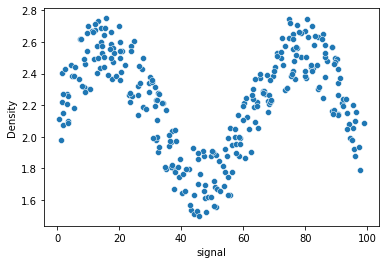

In [6]:
sns.scatterplot(x='signal',y='Density',data=df)

In [7]:
# note :  in this case the curve is not linear so we cannot use linear regression visually

In [14]:
X = df['signal'].values.reshape(-1,1)
y = df['Density']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr_model = LinearRegression()

In [19]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [21]:
lr_preds = lr_model.predict(X_test)

In [22]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [25]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

In [27]:
signal_range = np.arange(1,100)

In [28]:
signal_range


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [29]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

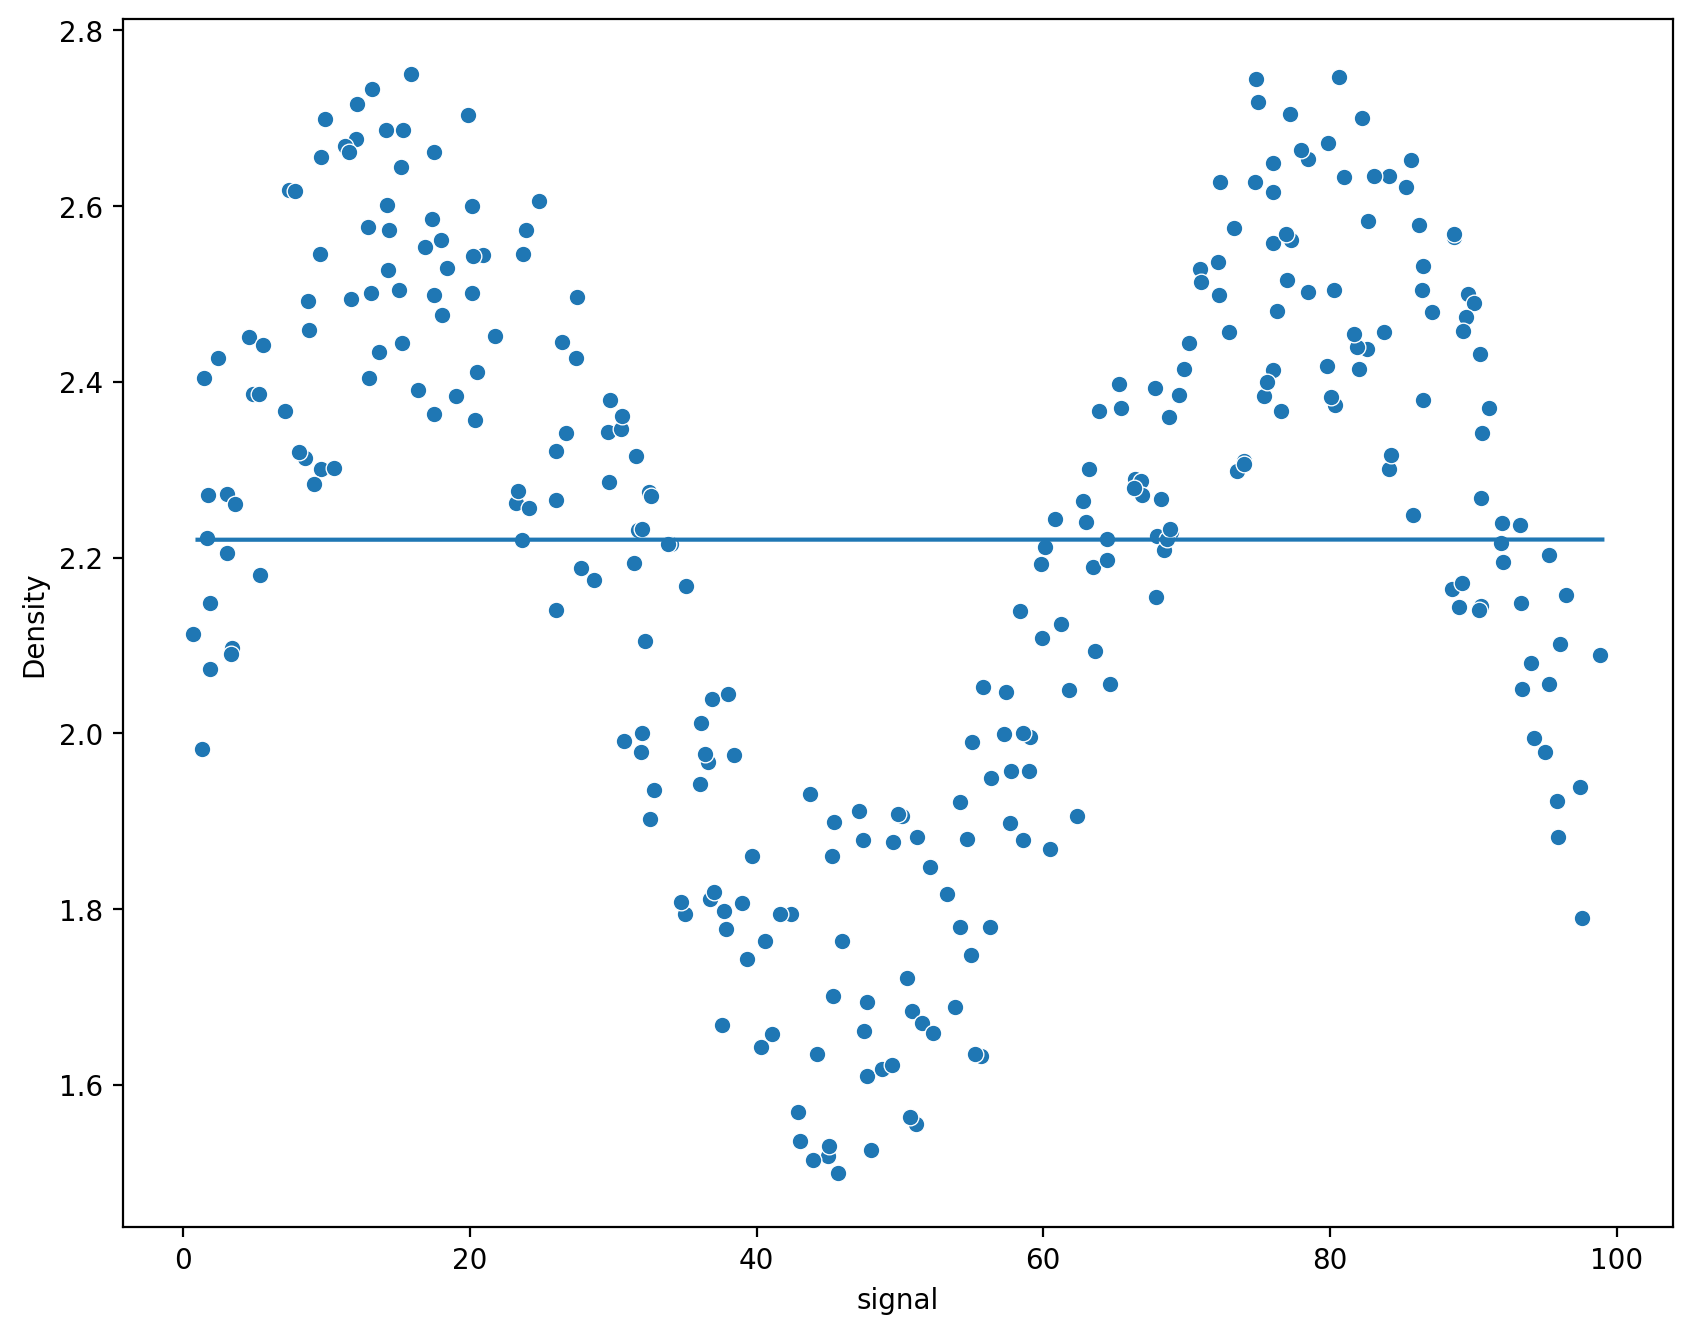

In [30]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(x='signal',y='Density',data=df)

plt.plot(signal_range,signal_preds)

In [ ]:
#from performance metrics it seems to be doing well but if the we the graph and see as they preds look to be fitting to the linear line 

# 2. polynomial regression

In [40]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE : {mae}')
    print(f'RMSE : {rmse}')
    
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='signal', y ='Density',data=df,color='black')
    plt.plot(signal_range,signal_preds)
    

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [44]:
pipe = make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

MAE : 0.1196911505437652
RMSE : 0.13807435345557376


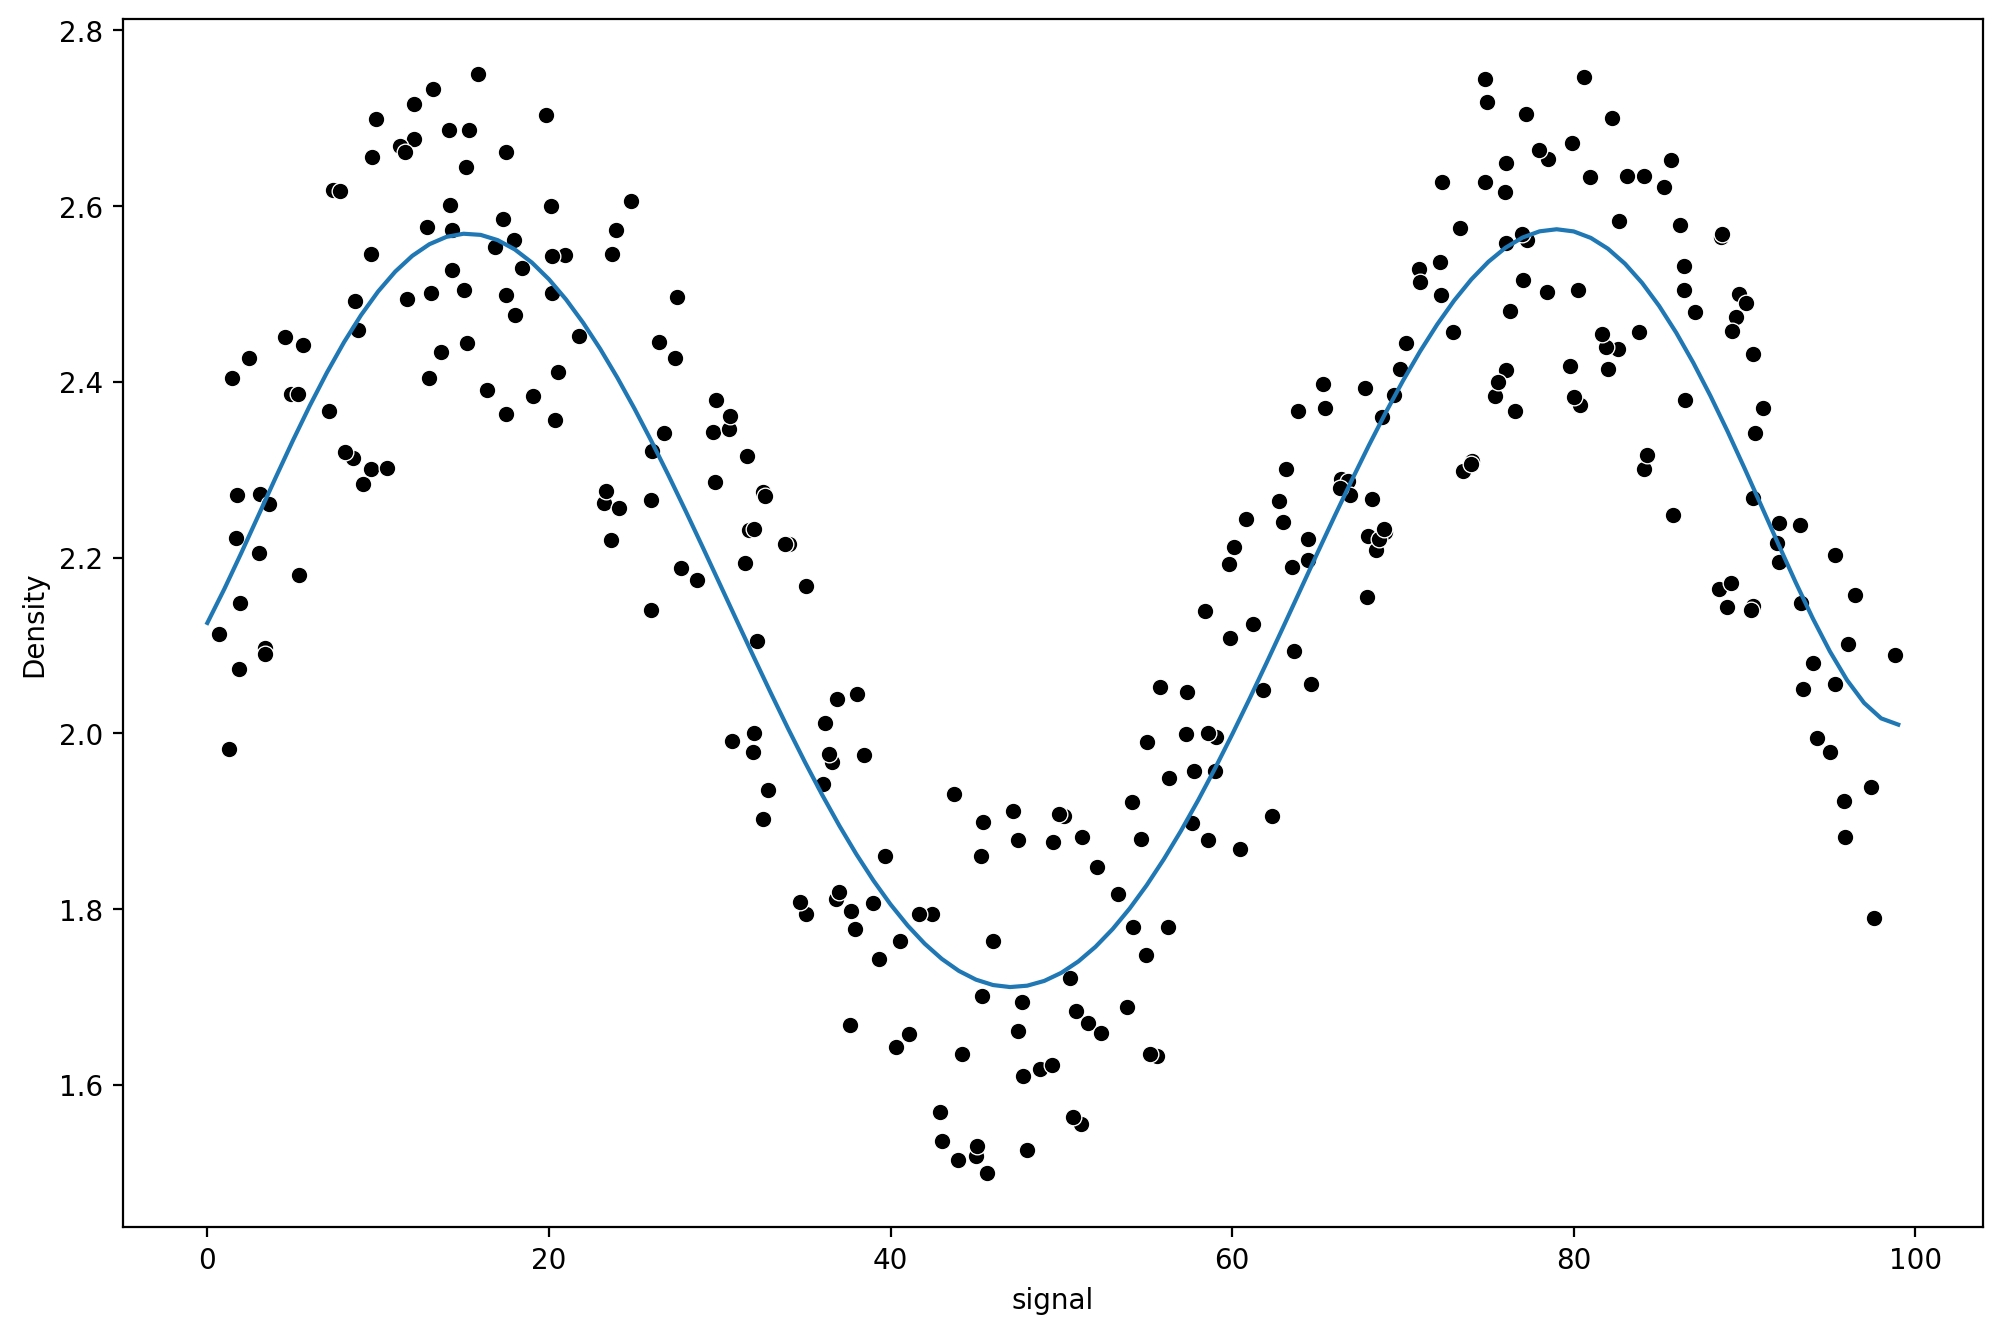

In [45]:
run_model(pipe,X_train,y_train,X_test,y_test)

# KNN regression

In [46]:
from sklearn.neighbors import KNeighborsRegressor

MAE : 0.11877297474442378
RMSE : 0.1523487028635337
MAE : 0.12198383614100558
RMSE : 0.13730685016923647
MAE : 0.11635971693292672
RMSE : 0.13277855732740926


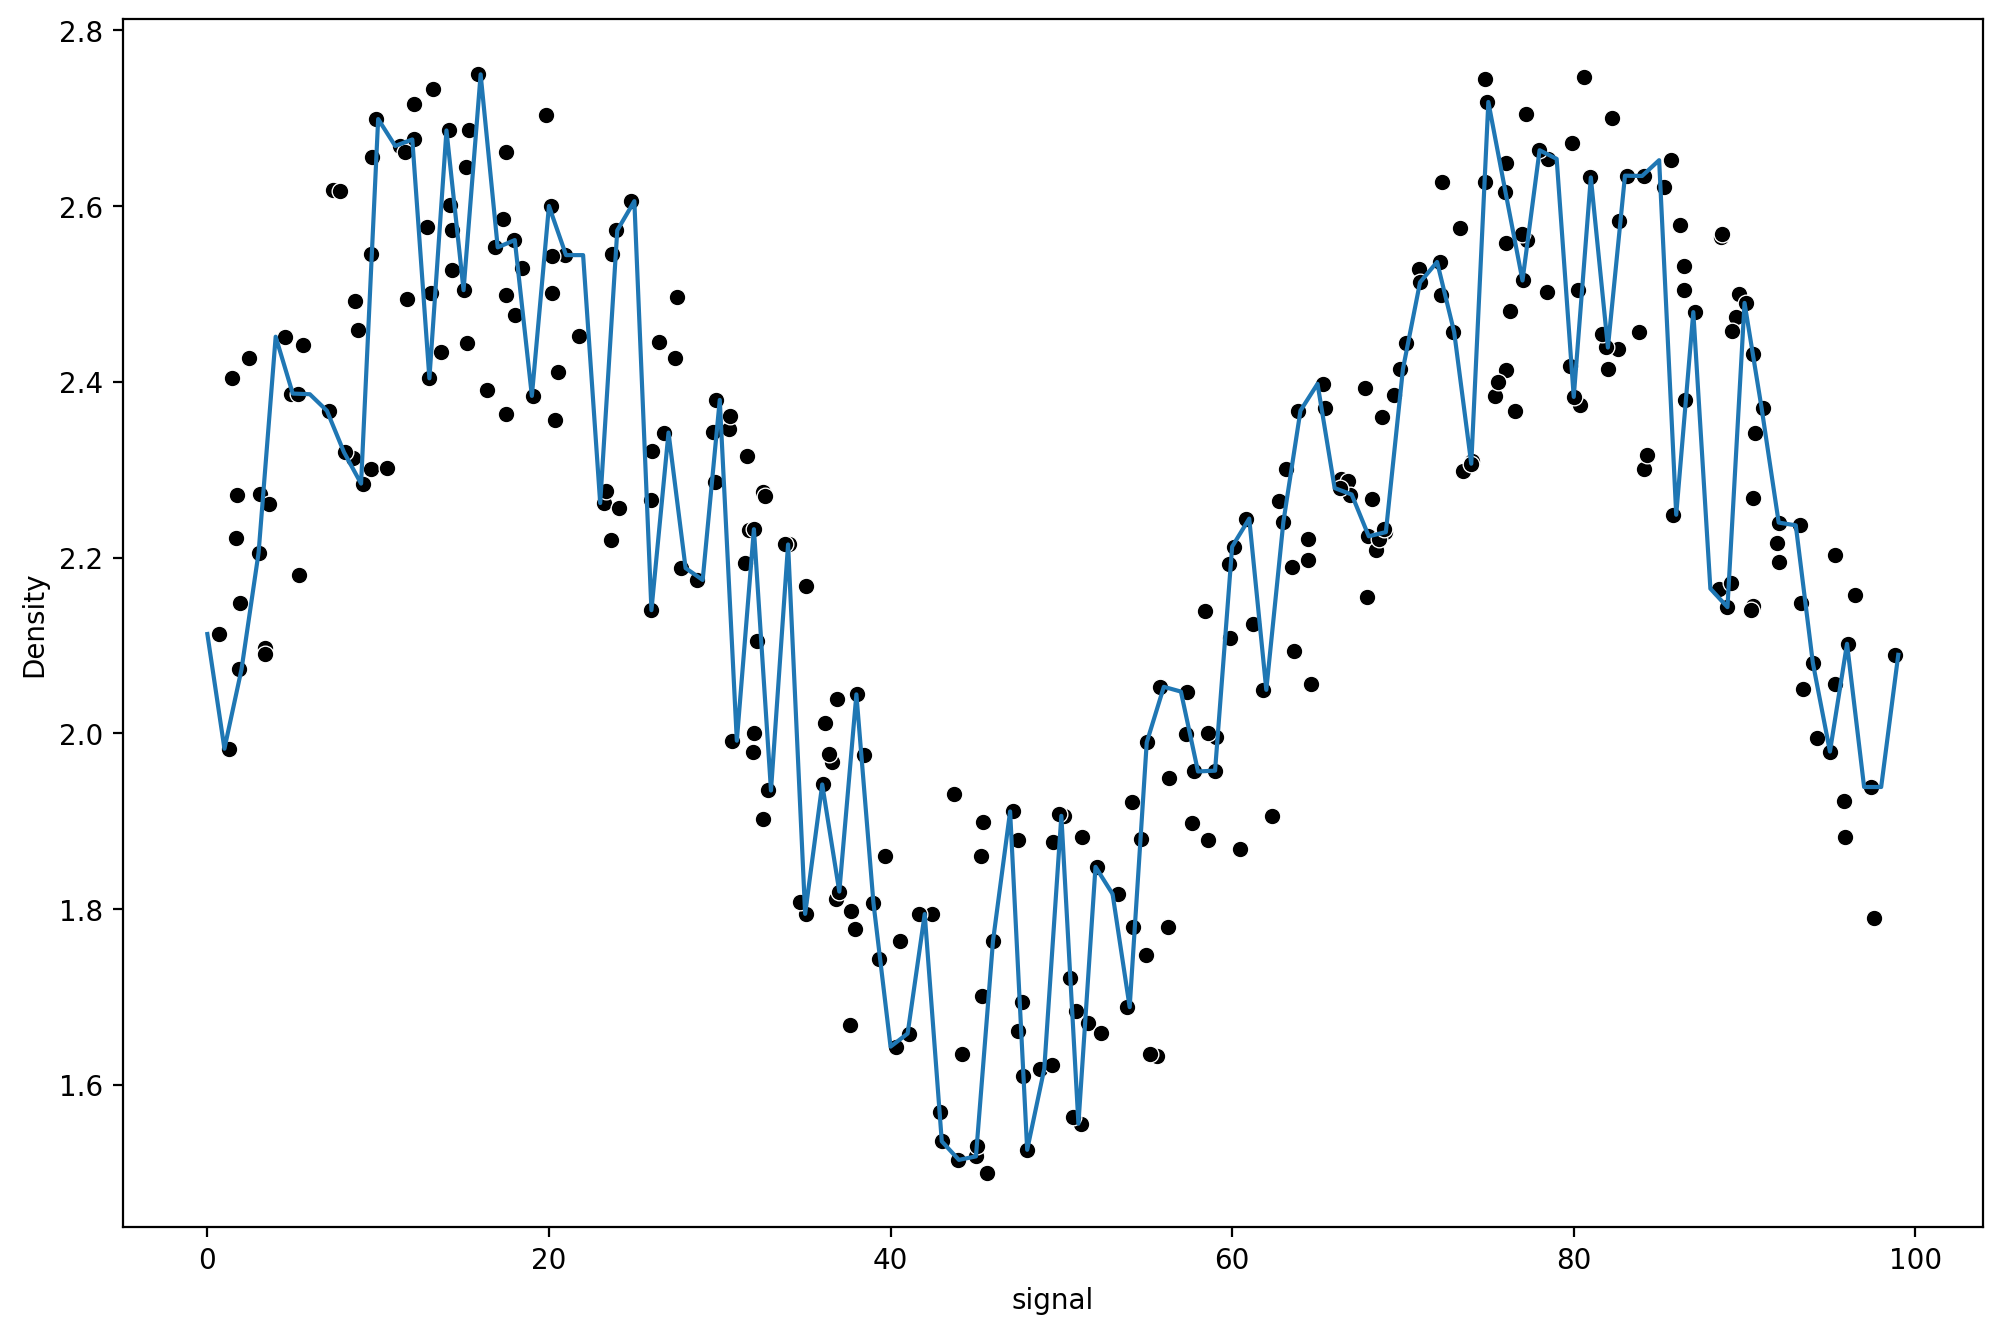

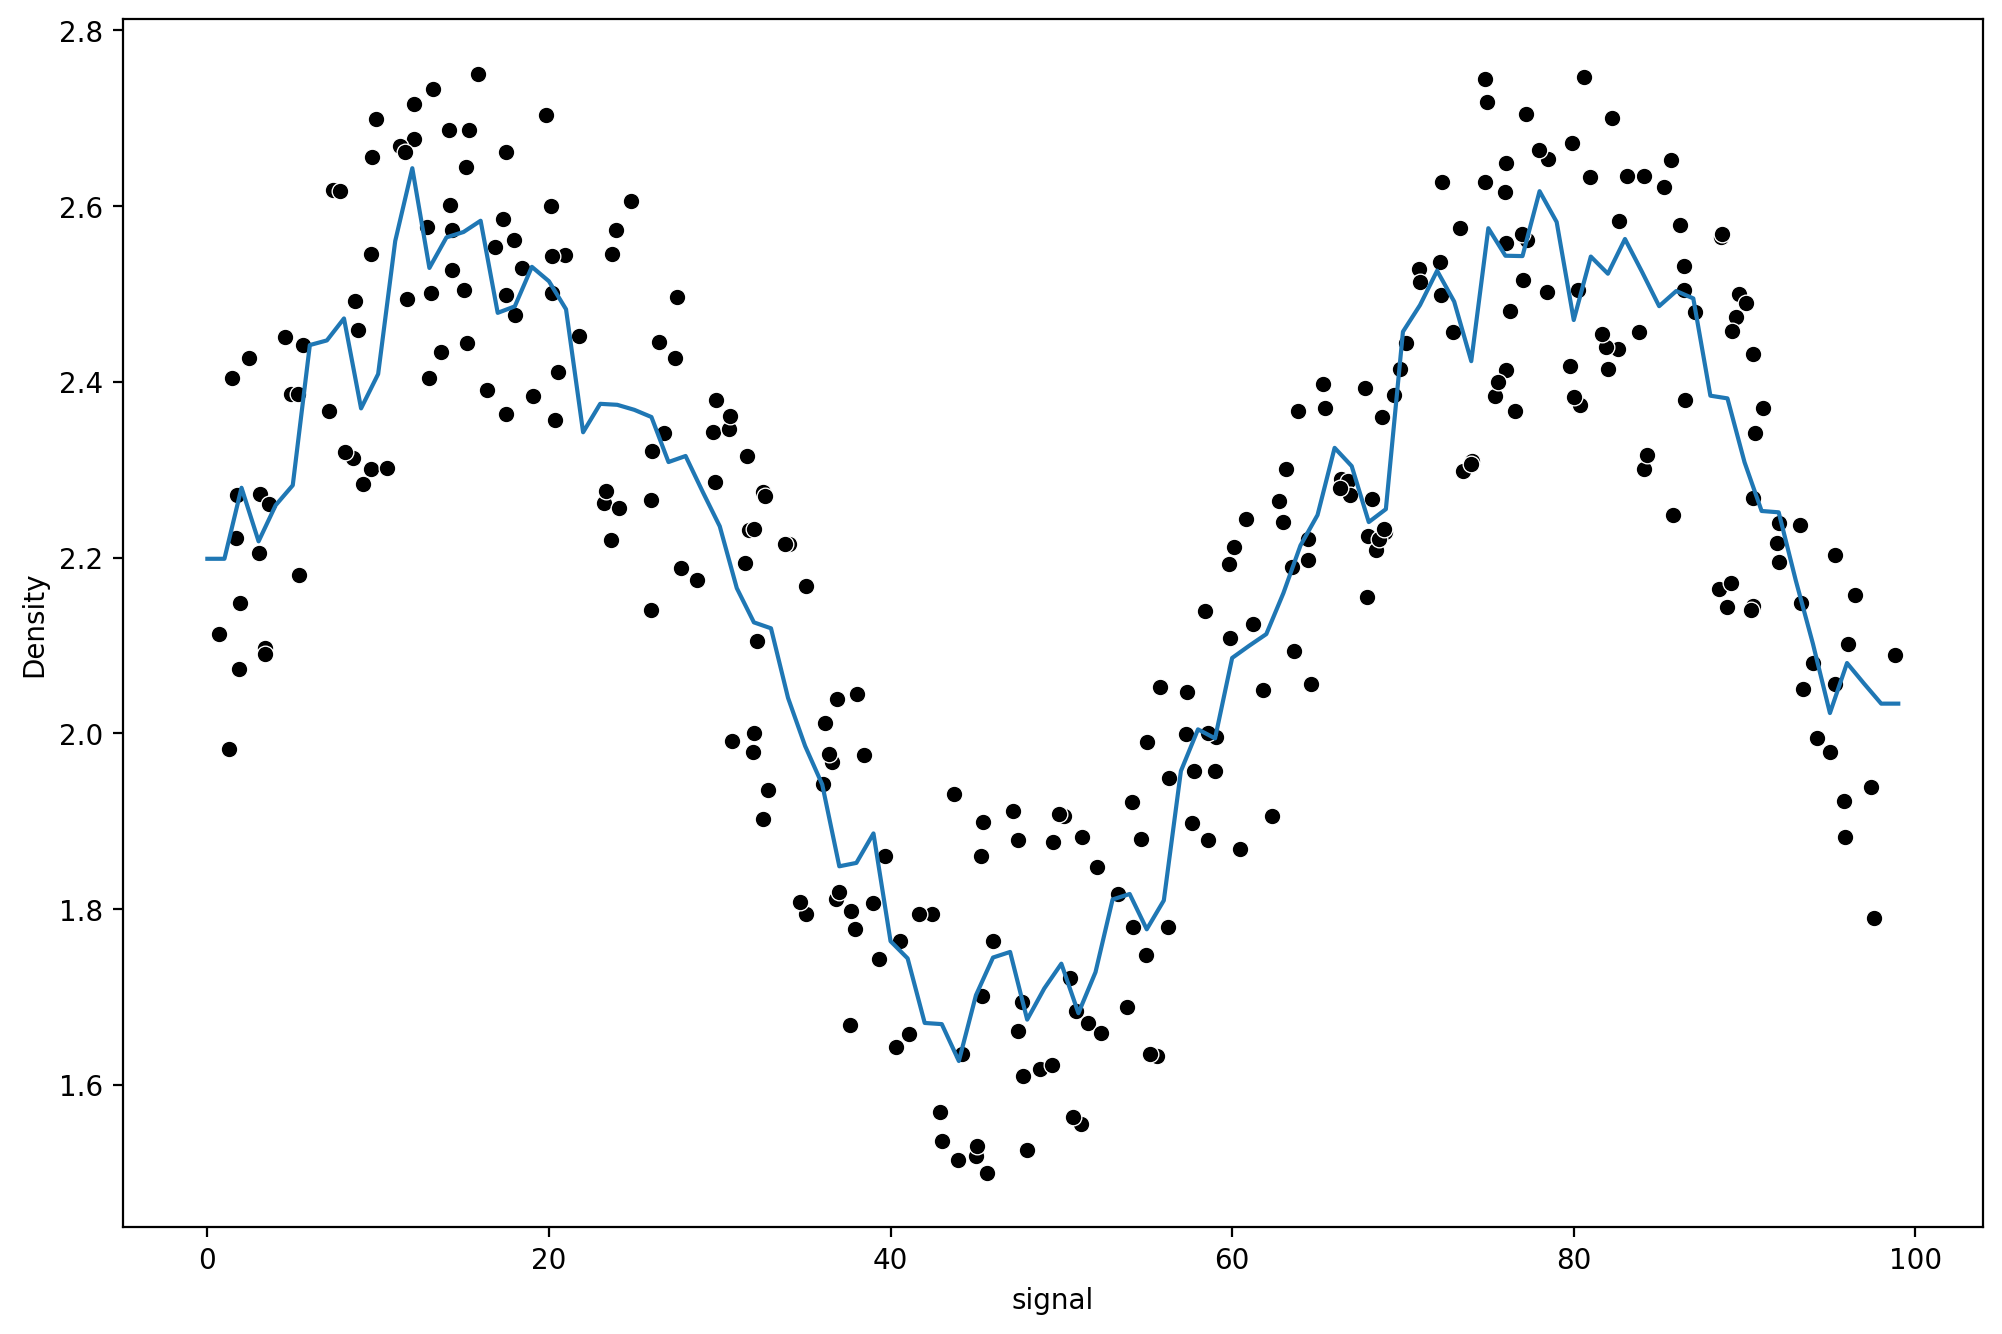

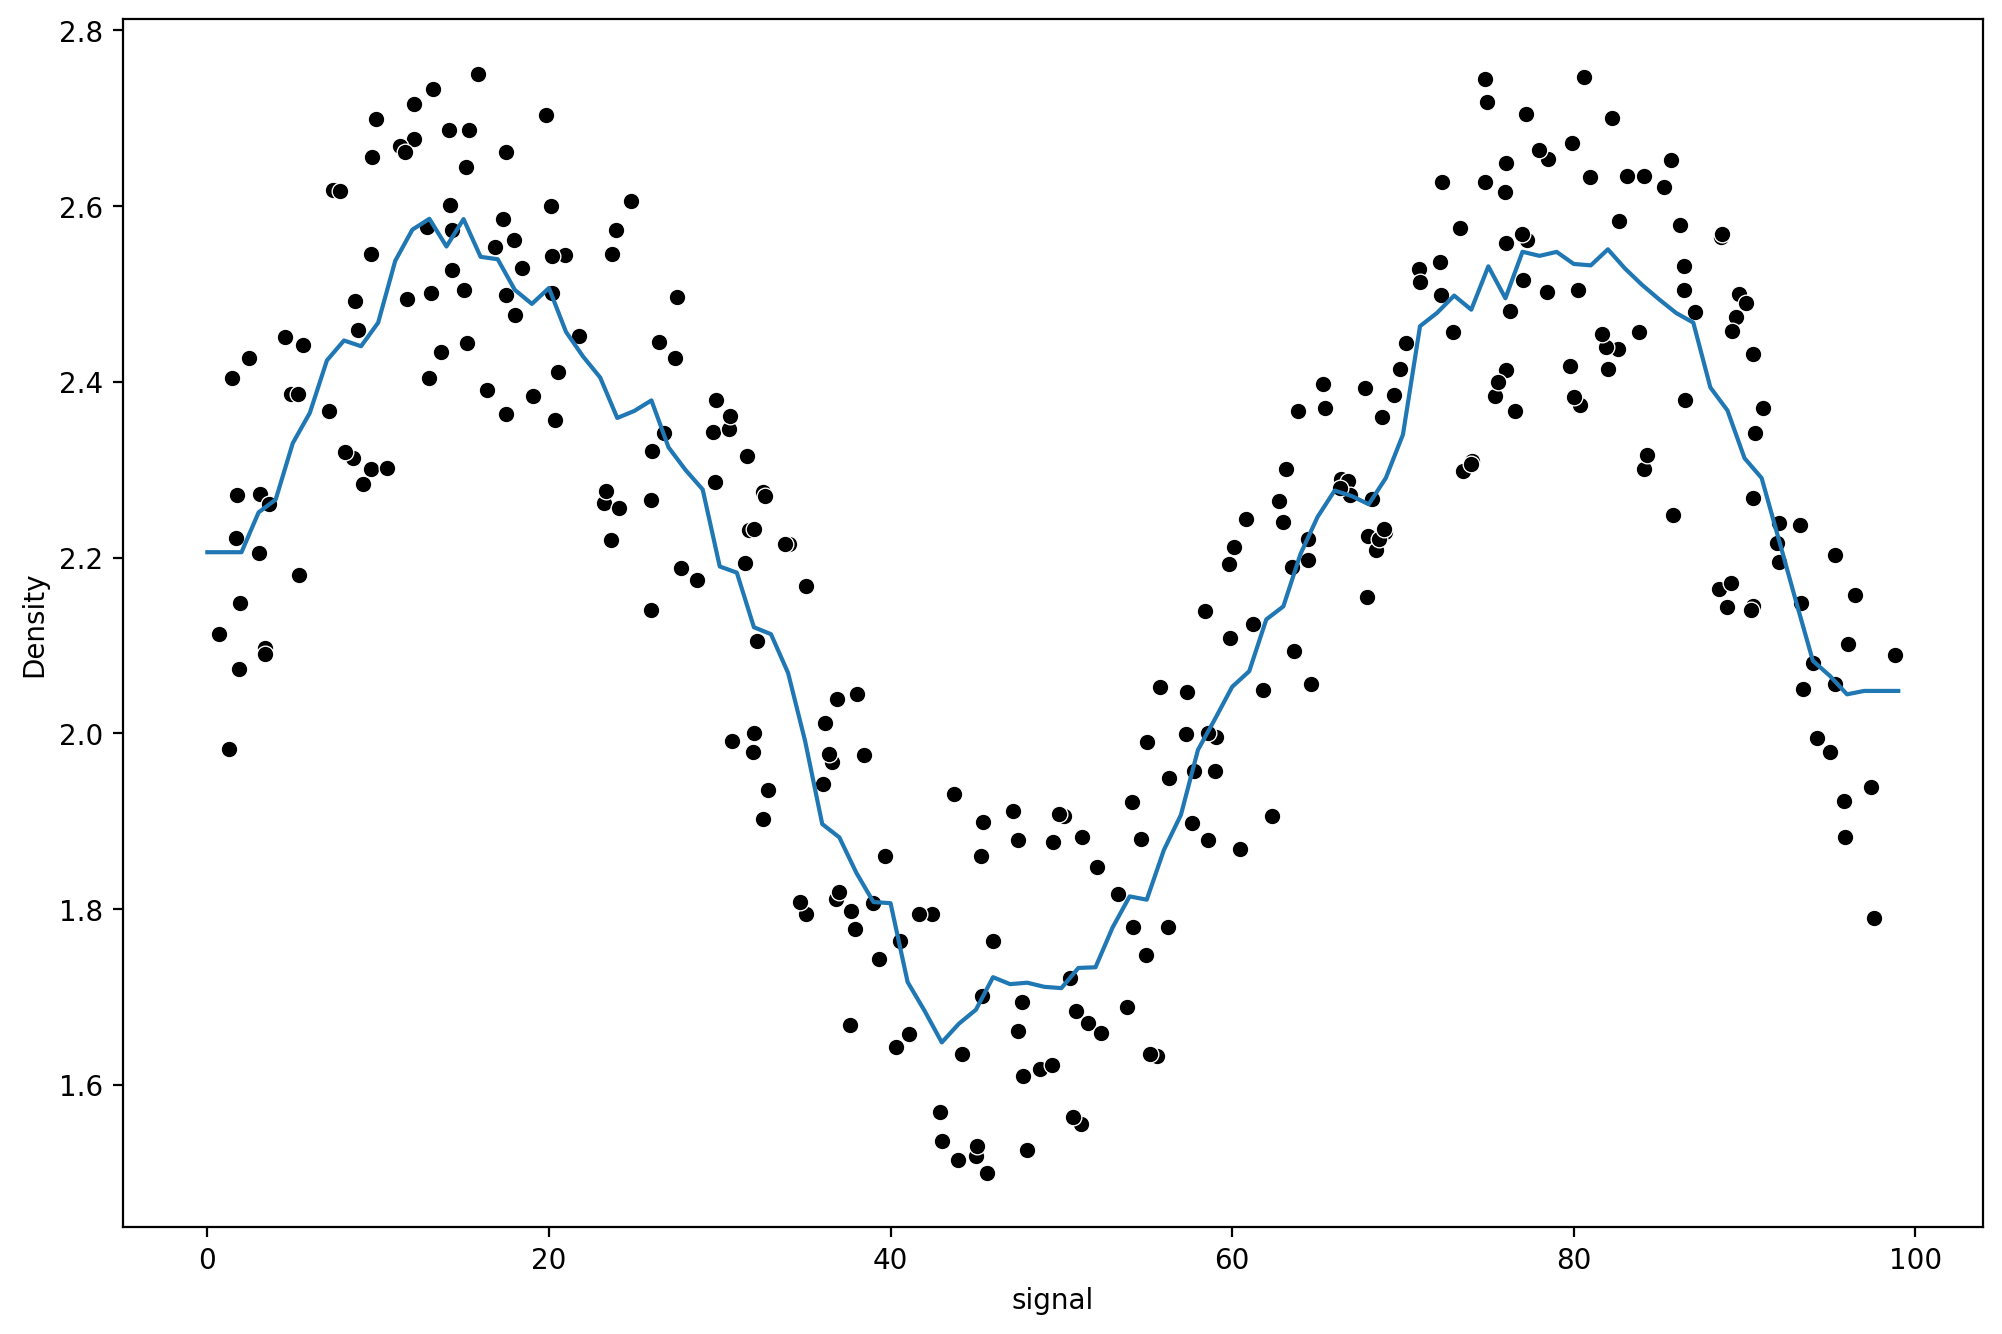

In [48]:
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

# Decision tree regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

MAE : 0.11877297474442378
RMSE : 0.1523487028635337


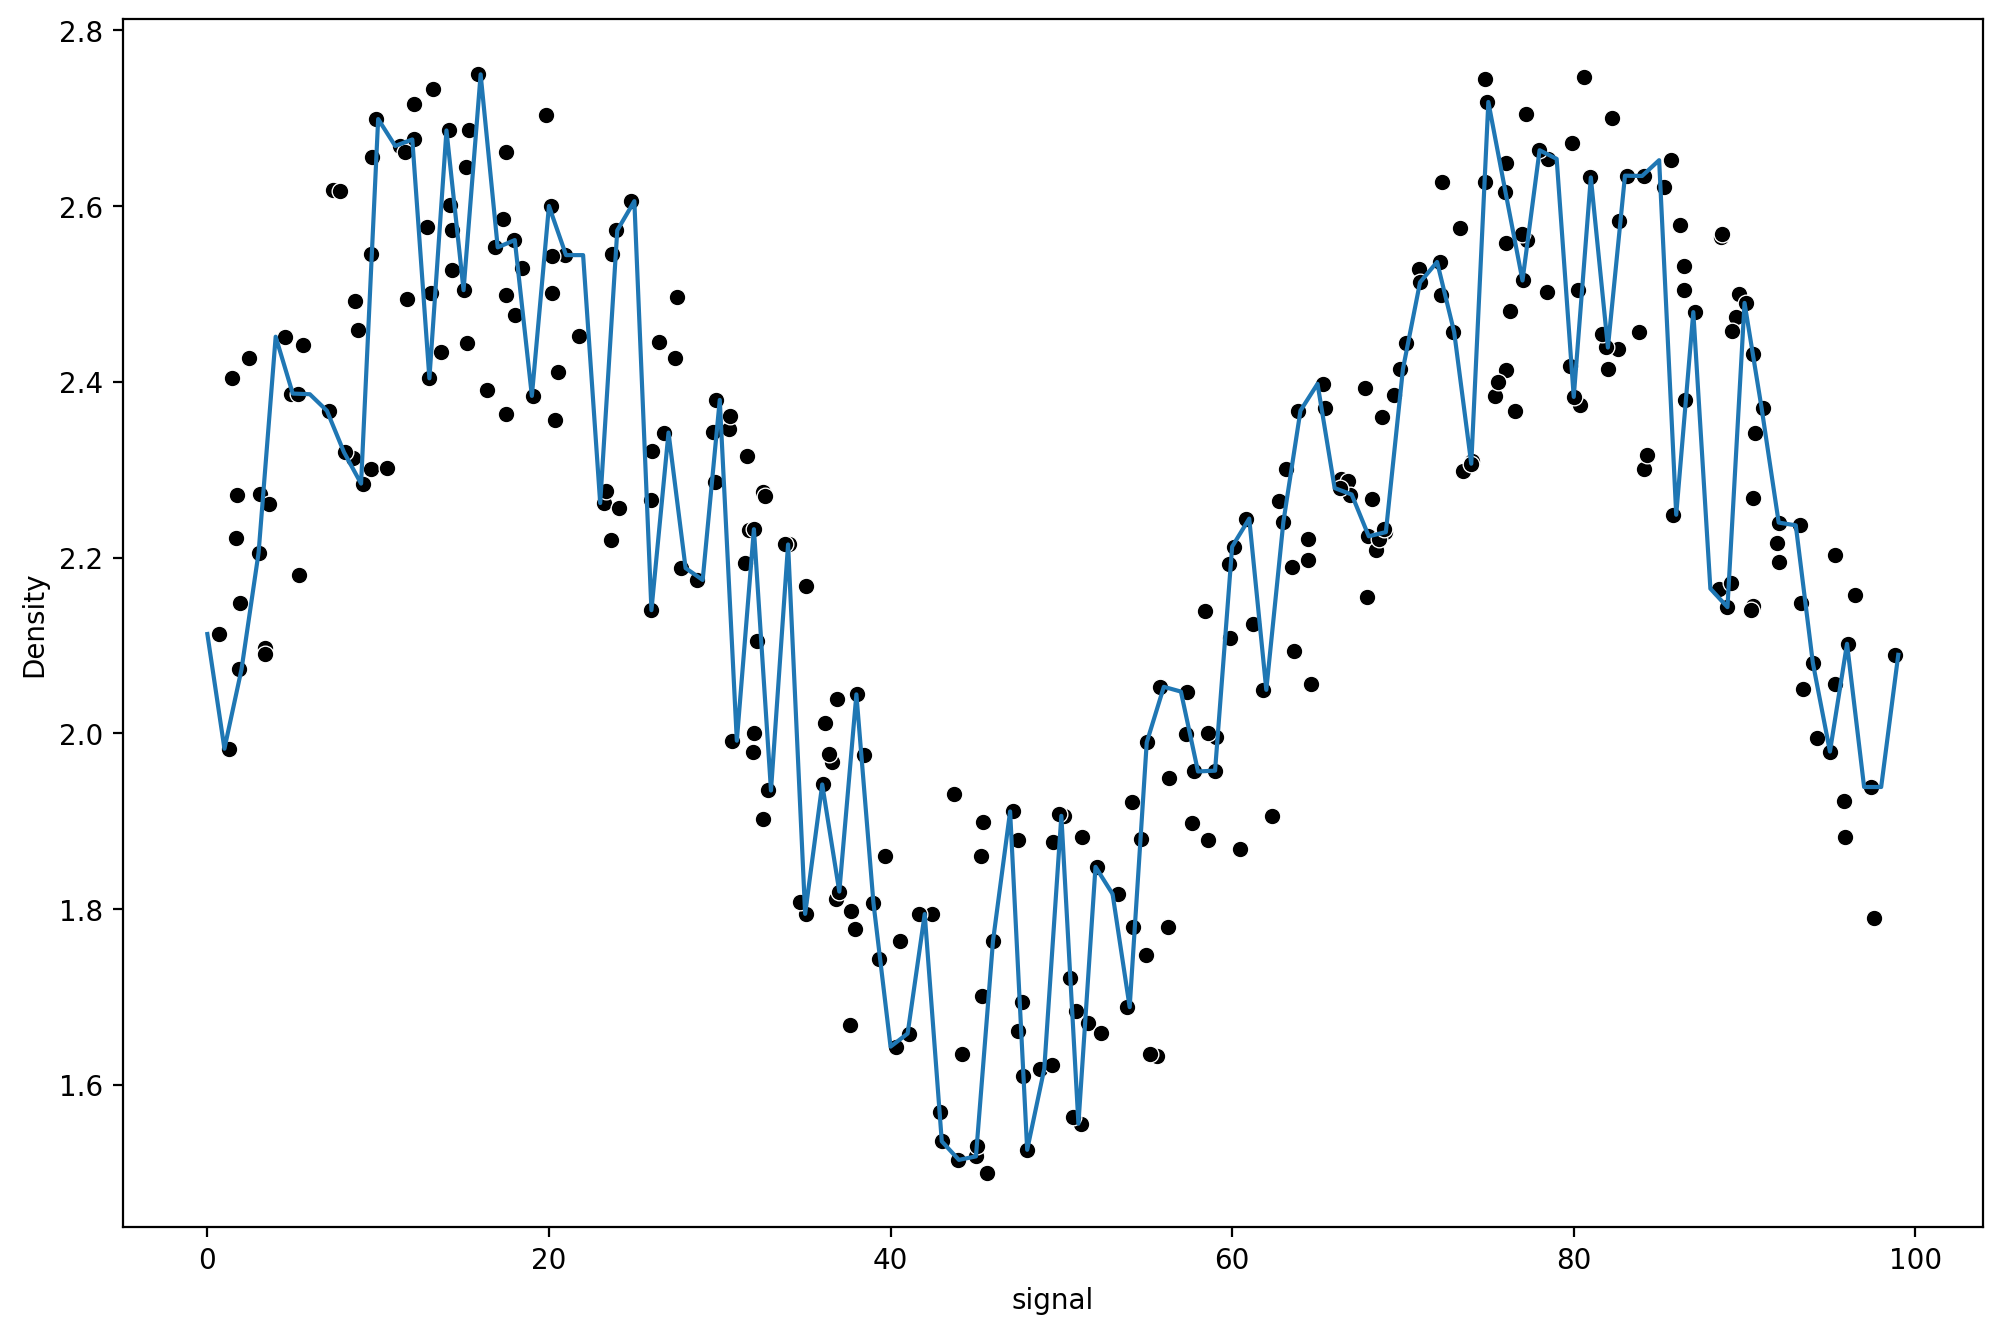

In [50]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

## SVR 

In [52]:
from sklearn.svm import SVR

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
svr  = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
             'gamma': ['auto','scale']}
grid = GridSearchCV(svr,param_grid)

MAE : 0.10854210121348368
RMSE : 0.12646999302046696


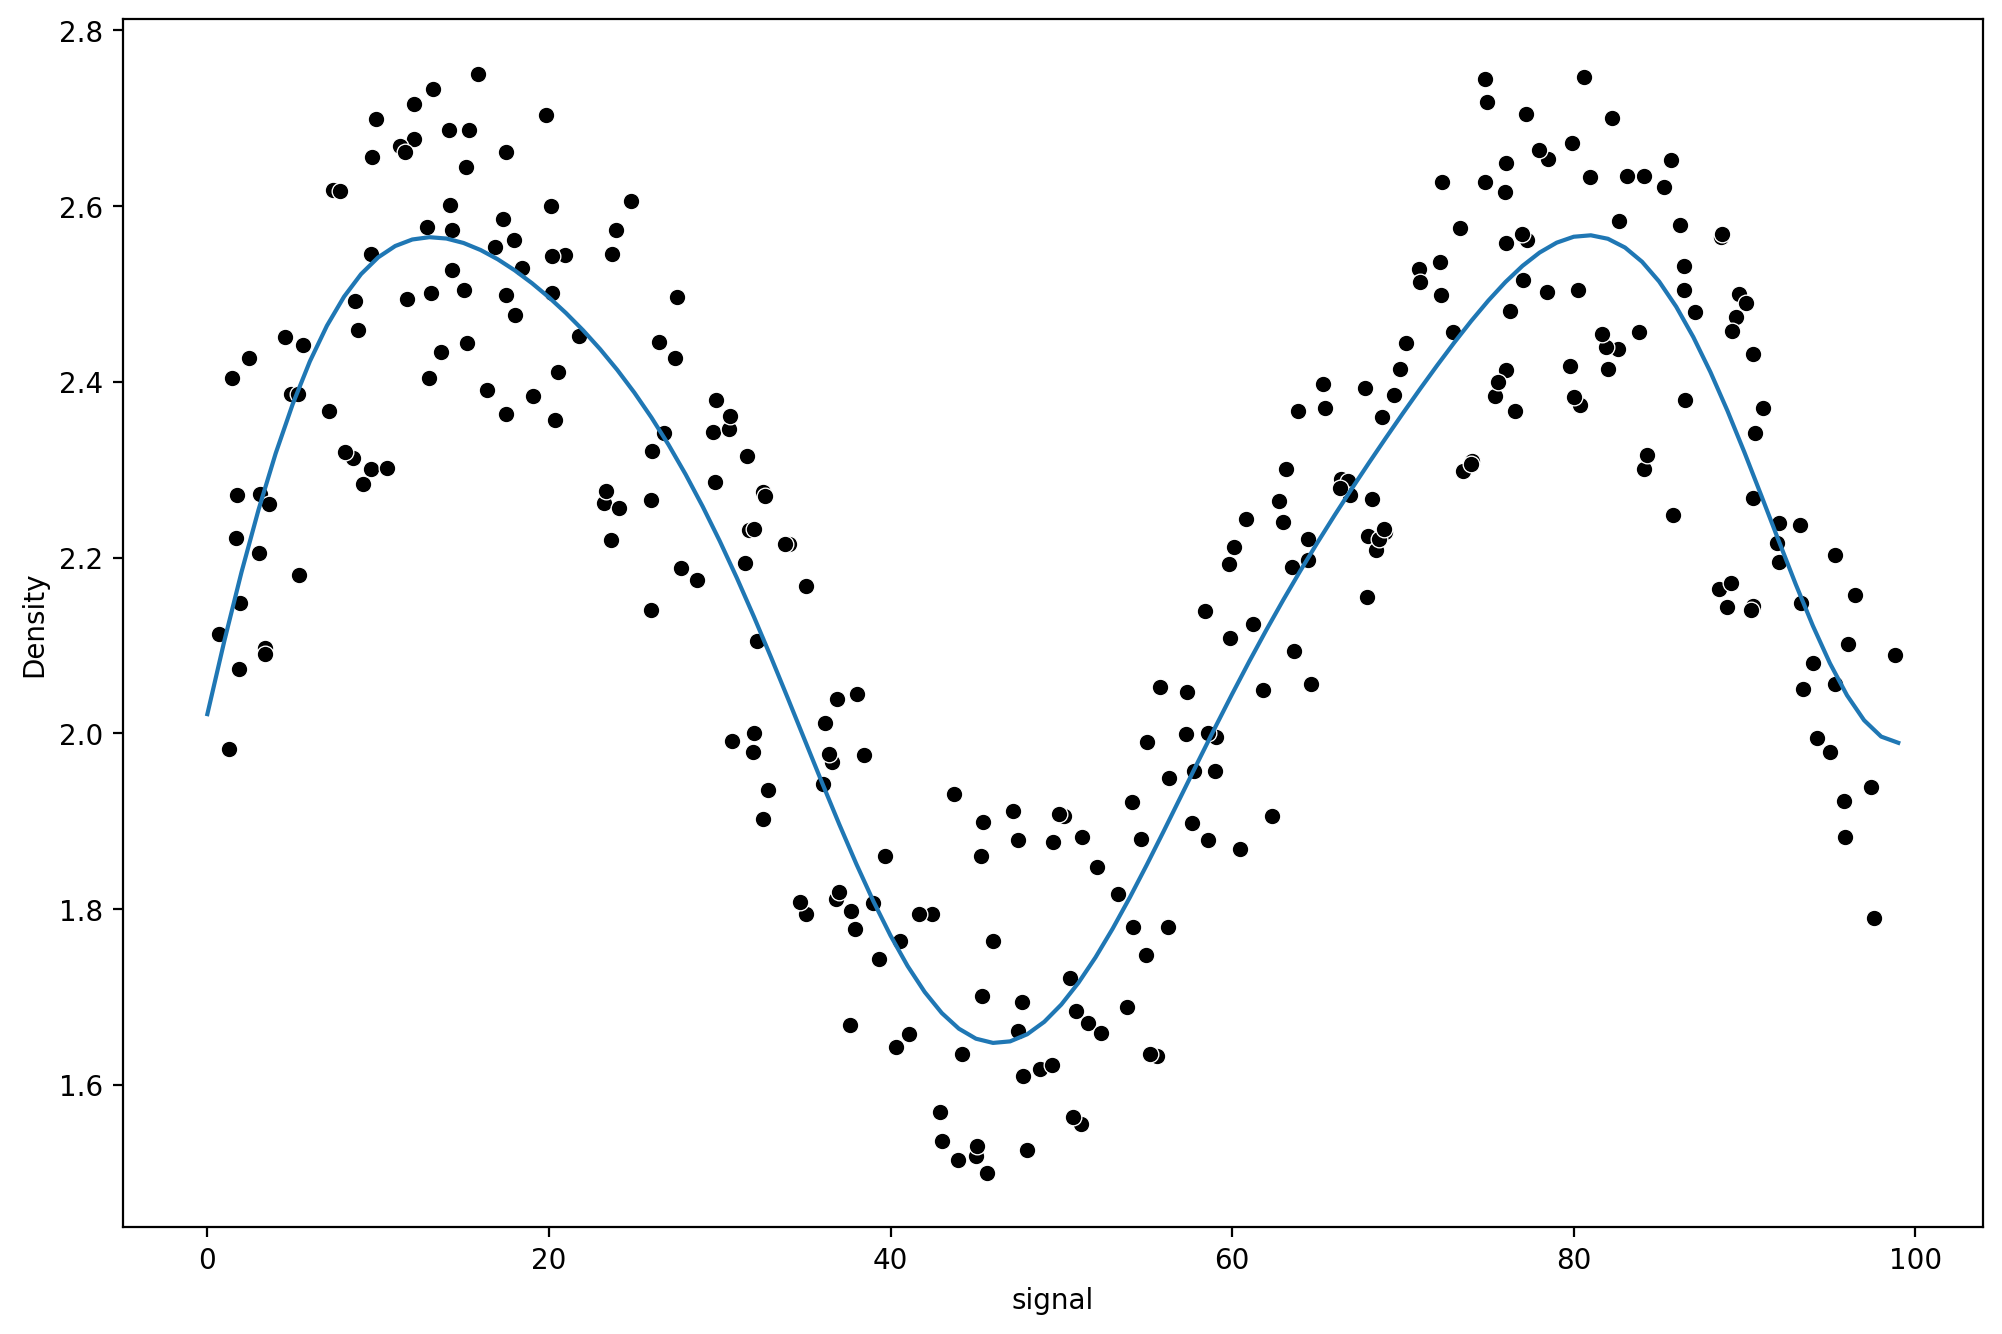

In [55]:
run_model(grid,X_train,y_train,X_test,y_test)

In [57]:
## Random forest regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfr =  RandomForestRegressor(n_estimators=10)

MAE : 0.10945233421257888
RMSE : 0.13417714911978265


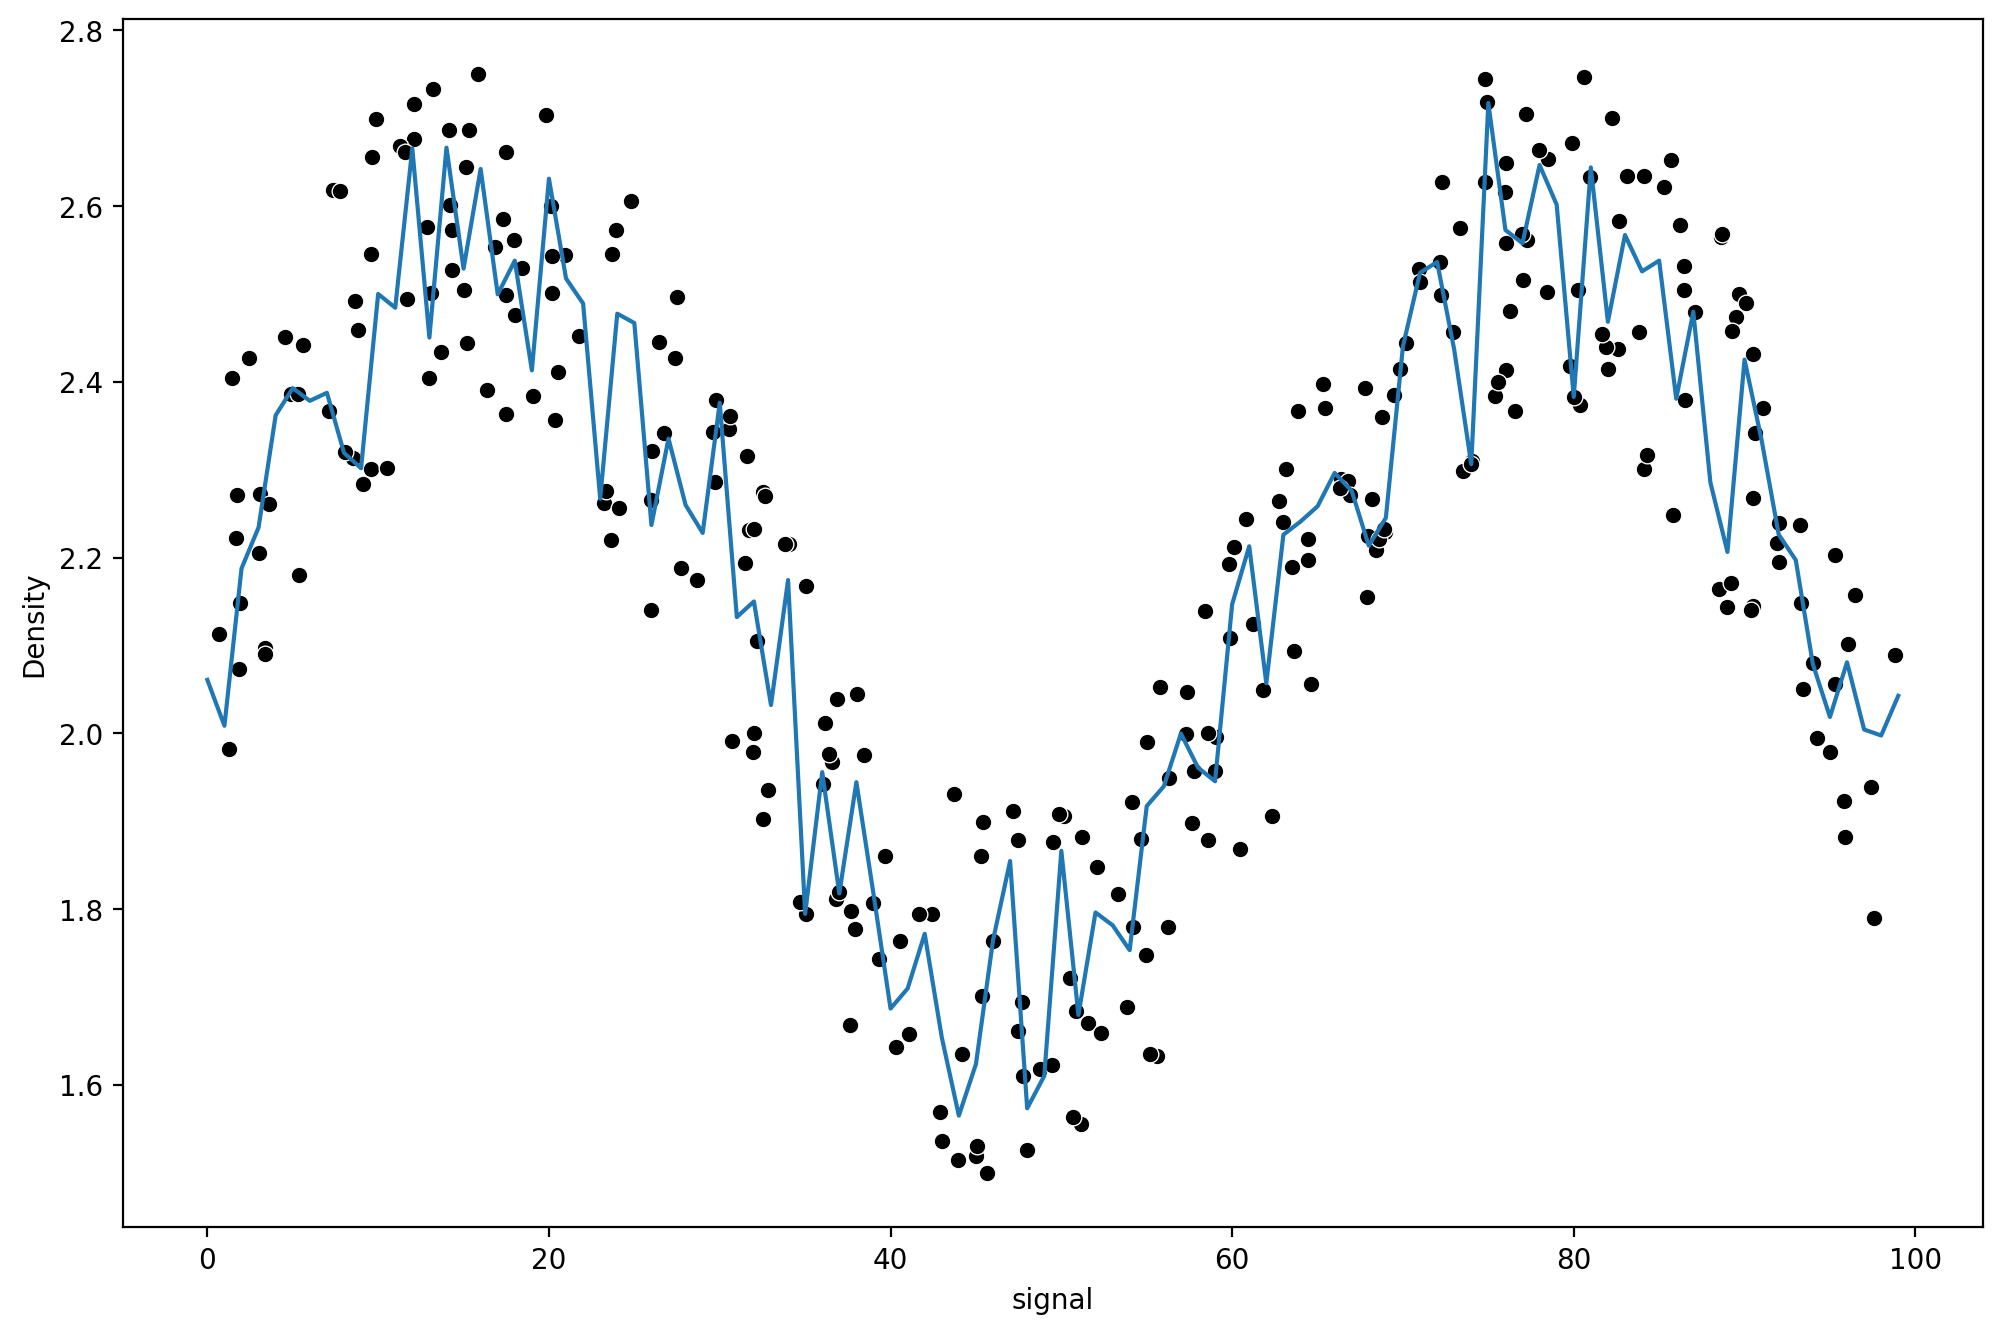

In [60]:
run_model(rfr,X_train,y_train,X_test,y_test)